In [2]:
import os
os.getcwd()

'/Users/alex/Documents/IE/Group assignment-2'

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

In [47]:
data_train = pd.read_csv("modeling_set.csv")

In [48]:
data_train.time_left = pd.cut(data_train.time_left,bins=[0,50,75,100,125, 150, 175],labels=[1,2,3,4,5,6])

In [49]:
data_test = pd.read_csv("validation_set.csv")

In [50]:
data_test.time_left = pd.cut(data_test.time_left,bins=[0,50,75,100,125, 150, 175],labels=[1,2,3,4,5,6])

In [51]:
data_train.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,4,10.0,7.0,de_dust2,False,500.0,500.0,86.0,483.0,14900.0,...,4.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,T
1,4,15.0,14.0,de_inferno,False,500.0,500.0,471.0,500.0,22700.0,...,1.0,5.0,2.0,4.0,0.0,1.0,3.0,0.0,0.0,CT
2,6,9.0,13.0,de_mirage,False,500.0,500.0,473.0,0.0,32300.0,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
3,1,14.0,15.0,de_inferno,False,468.0,489.0,495.0,495.0,2850.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T
4,2,3.0,2.0,de_inferno,False,497.0,400.0,500.0,400.0,5600.0,...,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,T


In [52]:
data_test.round_winner=data_test.round_winner.astype('category').cat.codes
data_test.map=data_test.map.astype('category').cat.codes
data_test.bomb_planted=data_test.bomb_planted.astype('category').cat.codes

In [53]:
data_train.round_winner=data_train.round_winner.astype('category').cat.codes
data_train.map=data_train.map.astype('category').cat.codes
data_train.bomb_planted=data_train.bomb_planted.astype('category').cat.codes

In [54]:
data_train.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,4,10.0,7.0,1,0,500.0,500.0,86.0,483.0,14900.0,...,4.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,1
1,4,15.0,14.0,2,0,500.0,500.0,471.0,500.0,22700.0,...,1.0,5.0,2.0,4.0,0.0,1.0,3.0,0.0,0.0,0
2,6,9.0,13.0,3,0,500.0,500.0,473.0,0.0,32300.0,...,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,1,14.0,15.0,2,0,468.0,489.0,495.0,495.0,2850.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,2,3.0,2.0,2,0,497.0,400.0,500.0,400.0,5600.0,...,2.0,2.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,1


In [55]:
data_test.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,3,2.0,6.0,3,0,400.0,300.0,400.0,300.0,1100.0,...,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1
1,1,5.0,5.0,4,0,417.0,149.0,495.0,184.0,5550.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,4,7.0,3.0,3,0,500.0,500.0,500.0,500.0,5400.0,...,5.0,5.0,4.0,3.0,0.0,1.0,1.0,0.0,0.0,1
3,3,10.0,7.0,1,0,228.0,300.0,195.0,300.0,800.0,...,2.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,1
4,1,5.0,4.0,5,0,400.0,478.0,396.0,497.0,22100.0,...,3.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,1


In [65]:
data_test.dtypes

time_left                    category
ct_score                      float64
t_score                       float64
map                              int8
bomb_planted                     int8
                               ...   
ct_grenade_molotovgrenade     float64
t_grenade_molotovgrenade      float64
ct_grenade_decoygrenade       float64
t_grenade_decoygrenade        float64
round_winner                     int8
Length: 97, dtype: object

In [67]:
data_test["time_left"] = pd.to_numeric(data_test["time_left"])

In [69]:
data_train["time_left"] = pd.to_numeric(data_train["time_left"])

In [70]:
data_train.dtypes

time_left                      int64
ct_score                     float64
t_score                      float64
map                             int8
bomb_planted                    int8
                              ...   
ct_grenade_molotovgrenade    float64
t_grenade_molotovgrenade     float64
ct_grenade_decoygrenade      float64
t_grenade_decoygrenade       float64
round_winner                    int8
Length: 97, dtype: object

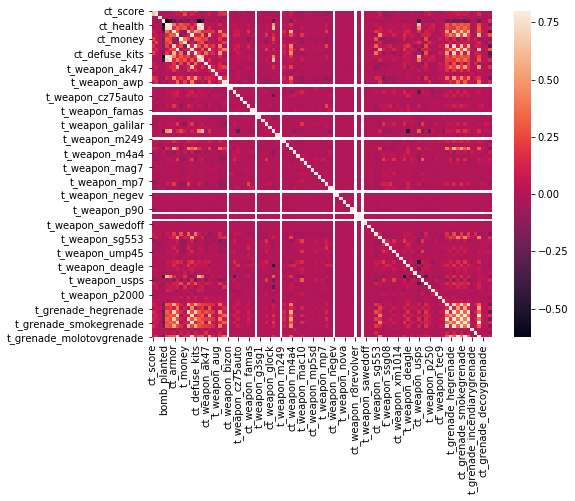

In [20]:
import seaborn as sns
C_mat = data_train.corr()
fig = plt.figure(figsize = (8,6))

sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

Heatmap

XGBoost

In [72]:
#msk = np.random.rand(len(data_train)) < 0.8
train_set = data_train
test_set = data_train

In [73]:
X_train = train_set.drop("round_winner", axis=1)
X_test = test_set.drop("round_winner", axis=1)
y_train = train_set["round_winner"]
y_test = test_set["round_winner"]

In [74]:
import xgboost as xgb

In [75]:
from xgboost import XGBClassifier

In [76]:
import xgboost as xgb
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV

In [77]:
%%time
# add your code here
cv_params = {'max_depth': [7], 'min_child_weight': [3], 'n_estimators': [300]}
ind_params = {'learning_rate': 0.1, 'random_state':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
              'objective': 'binary:logistic'}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                             cv_params, scoring='accuracy', 
                             cv = 5, n_jobs = -1) 
optimized_GBM.fit(X_train, y_train)

CPU times: user 3min 30s, sys: 2 s, total: 3min 32s
Wall time: 15min 11s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [7], 'min_child_weight': [3],
                         'n_estimators': [300]},
             pre_dispatch='2*n_jobs', refit=True

In [28]:
# add your code here
print(optimized_GBM.best_params_)

{'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300}


In [78]:
from sklearn.metrics import accuracy_score
y_pred = optimized_GBM.predict(X_test)
print("#Mislabeled points (XGB) : {} out of {}".format(sum(y_pred != y_test), len(y_test)))
print("Model Accuray: {:.4f}".format(accuracy_score(y_test, y_pred)))

#Mislabeled points (XGB) : 10180 out of 85687
Model Accuray: 0.8812


In [29]:
# this is the prevoius result with removing the 
from sklearn.metrics import accuracy_score
y_pred = optimized_GBM.predict(X_test)
print("#Mislabeled points (XGB) : {} out of {}".format(sum(y_pred != y_test), len(y_test)))
print("Model Accuray: {:.4f}".format(accuracy_score(y_test, y_pred)))

#Mislabeled points (XGB) : 2988 out of 16957
Model Accuray: 0.8238


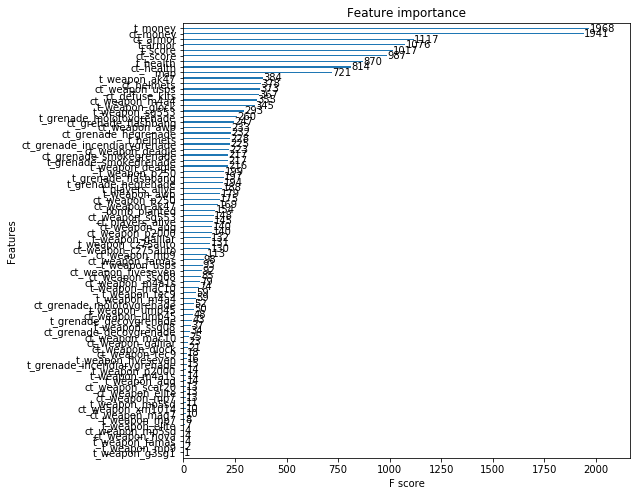

In [30]:
plt.figure(figsize=(8,8))
xgb.plot_importance(optimized_GBM.best_estimator_, ax=plt.gca())
plt.grid(b=None)

Random Forrest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_features = 'auto', max_depth = 20, criterion = 'entropy', min_samples_split = 3, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto'],
    'max_depth' : [10, 20, 30],
    'criterion' :['entropy'], 
    "min_samples_split": [2, 3, 10]
}


In [33]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 300}

In [34]:
from sklearn.metrics import accuracy_score
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print("#Mislabeled points (RF) : {1} out of {0}".format(len(y_test), sum(y_pred != y_test)))
print("Model Accuray: {:.4f}".format(accuracy_score(y_test, y_pred)))

#Mislabeled points (RF) : 2897 out of 16957
Model Accuray: 0.8292


In [ ]:
importances = rf.feature_importances_
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

In [ ]:
import seaborn as sns
sns.heatmap(data_train.corr(), annot=True)

Neural Networks

In [ ]:
pd.DataFrame(rfc.feature_importances_, 
             index=X_train.columns, 
             columns=["importance"]).sort_values("importance", ascending=False).plot(kind="bar", figsize=(8,4), ax=plt.gca())

In [ ]:
#data_train_test = data_train.drop('Cost to Income Ratio', axis=1)

In [ ]:
msk = np.random.rand(len(data_train)) < 0.8
train_set = data_train[msk]
test_set = data_train[~msk]

In [ ]:
X_train = train_set.drop("round_winner", axis=1)
X_test = test_set.drop("round_winner", axis=1)
y_train = train_set["round_winner"]
y_test = test_set["round_winner"]

In [ ]:
data_train.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=0)
y_pred = rf.fit(X_train, y_train).predict(X_test)
print("#Mislabeled points (RF) : {1} out of {0}".format(len(y_test), sum(y_pred != y_test)))
print("Model Accuray: {:.4f}".format(accuracy_score(y_test, y_pred)))

In [ ]:
%%time
# add your code here
cv_params = {'max_depth': [5, 7], 'min_child_weight': [1, 3], 'n_estimators': [50, 100]}
ind_params = {'learning_rate': 0.1, 'random_state':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
              'objective': 'binary:logistic'}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                             cv_params, scoring='accuracy', 
                             cv = 5, n_jobs = -1) 
optimized_GBM.fit(X_train, y_train)

In [ ]:
# add your code here
print(optimized_GBM.best_params_)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = optimized_GBM.predict(X_test)
print("#Mislabeled points (XGB) : {} out of {}".format(sum(y_pred != y_test), len(y_test)))
print("Model Accuray: {:.4f}".format(accuracy_score(y_test, y_pred)))

Neural Network

In [ ]:
#data_train = pd.read_csv("data_train", delimiter="\t", low_memory=False)

In [ ]:
#data_train = data_train.set_index('ID RSSD')

In [ ]:
data_train.head()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models       import Sequential, load_model
from tensorflow.keras.layers       import Dense,Dropout
from tensorflow.keras.callbacks    import ModelCheckpoint, EarlyStopping,CSVLogger
from tensorflow.keras.utils        import plot_model

In [ ]:
msk = np.random.rand(len(data_train)) < 0.8
train_set = data_train[msk]
test_set = data_train[~msk]

In [ ]:
X_train = train_set.drop("round_winner", axis=1)
X_test = test_set.drop("round_winner", axis=1)
y_train = train_set["round_winner"]
y_test = test_set["round_winner"]

In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
X_train = np.expand_dims(X_train, 2)

In [ ]:
# Import `Sequential` from `keras.models`
from tensorflow.keras.models import Sequential

# Import `Dense` from `keras.layers`
from tensorflow.keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(20, 1)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train, epochs=80, batch_size= 10, verbose=1)

In [ ]:
train_acc = model.evaluate(X_train, y_train, verbose=1)
test_acc = model.evaluate(X_test, y_test, verbose=1)
print(train_acc)
print(test_acc)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

In [ ]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from keras import optimizers

model = Sequential()
model.add(Dense(12, kernel_initializer='uniform', input_shape=(20,)))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
from keras.optimizers import RMSprop
rmsprop = RMSprop(lr=0.0001)
model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])

In [ ]:
from keras.layers import Activation, Dense

In [ ]:
from keras import optimizers

model = Sequential()
model.add(Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [ ]:
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(20,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)